<a href="https://colab.research.google.com/github/ChinmayiAnandAradhya/Deadlock-Avoidance/blob/main/OS_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Banker's Algorithm
class BankersAlgorithm:
    def __init__(self, available, max_demand, allocation):
        self.available = available
        self.max_demand = max_demand
        self.allocation = allocation
        self.need = self.calculate_need()

    def calculate_need(self):
        need = []
        for i in range(len(self.max_demand)):
            need.append([self.max_demand[i][j] - self.allocation[i][j] for j in range(len(self.max_demand[i]))])
        return need

    def is_safe(self):
        work = self.available[:]
        finish = [False] * len(self.allocation)
        safe_sequence = []

        while len(safe_sequence) < len(self.allocation):
            found = False
            for i in range(len(self.allocation)):
                if not finish[i] and all(self.need[i][j] <= work[j] for j in range(len(work))):
                    for j in range(len(work)):
                        work[j] += self.allocation[i][j]
                    finish[i] = True
                    safe_sequence.append(i)
                    found = True
                    break
            if not found:
                return False, []

        return True, safe_sequence

    def request_resources(self, process_num, request):
        if any(request[j] > self.need[process_num][j] for j in range(len(request))):
            print(f"Process {process_num} has exceeded its maximum claim.")
            return False

        if any(request[j] > self.available[j] for j in range(len(request))):
            print(f"Resources not available for process {process_num}'s request.")
            return False

        for j in range(len(request)):
            self.available[j] -= request[j]
            self.allocation[process_num][j] += request[j]
            self.need[process_num][j] -= request[j]

        safe, _ = self.is_safe()
        if not safe:
            for j in range(len(request)):
                self.available[j] += request[j]
                self.allocation[process_num][j] -= request[j]
                self.need[process_num][j] += request[j]
            print(f"Process {process_num}'s request leads to unsafe state.")
            return False

        print(f"Process {process_num}'s request has been granted.")
        return True

# Example usage
available = [3, 3, 2]
max_demand = [
    [7, 5, 3],
    [3, 2, 2],
    [9, 0, 2],
    [2, 2, 2],
    [4, 3, 3]
]
allocation = [
    [0, 1, 0],
    [2, 0, 0],
    [3, 0, 2],
    [2, 1, 1],
    [0, 0, 2]
]

bankers = BankersAlgorithm(available, max_demand, allocation)

# Check if initial state is safe
safe, sequence = bankers.is_safe()
print("Initial State Safe:", safe)
print("Safe Sequence:", sequence)

# Simulate a resource request
request = [1, 0, 2]
process_num = 1
bankers.request_resources(process_num, request)

# Check state after request
safe, sequence = bankers.is_safe()
print("State After Request Safe:", safe)
print("Safe Sequence After Request:", sequence)


Initial State Safe: True
Safe Sequence: [1, 3, 0, 2, 4]
Process 1's request has been granted.
State After Request Safe: True
Safe Sequence After Request: [1, 3, 0, 2, 4]


The system is in an unsafe state (cycle detected).


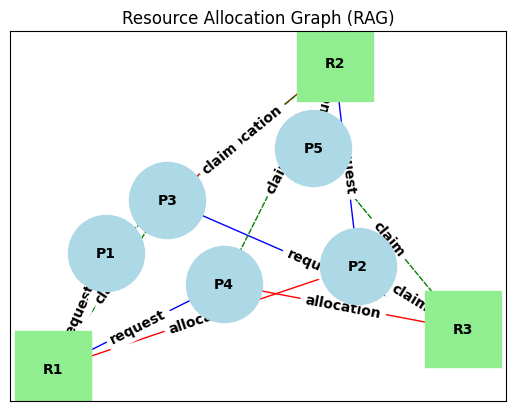

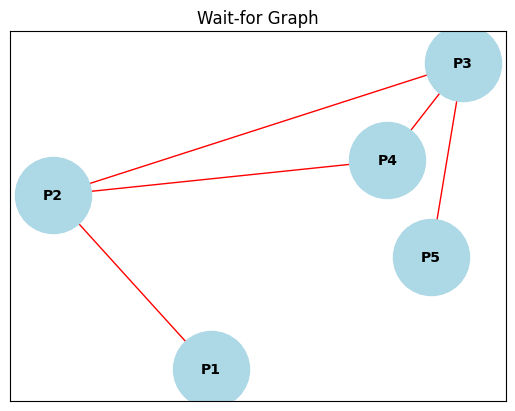

In [7]:
#Resorce Allocation Graph
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

class RAG:
    def __init__(self):
        self.graph = defaultdict(list)
        self.processes = set()
        self.resources = set()
        self.requests = []
        self.allocations = []
        self.claims = []

    def add_process(self, process):
        self.processes.add(process)

    def add_resource(self, resource):
        self.resources.add(resource)

    def add_request(self, process, resource):
        self.graph[process].append(resource)
        self.requests.append((process, resource))

    def add_assignment(self, resource, process):
        self.graph[resource].append(process)
        self.allocations.append((resource, process))

    def add_claim(self, process, resource):
        self.graph[process].append(resource)
        self.claims.append((process, resource))

    def remove_request(self, process, resource):
        self.graph[process].remove(resource)
        self.requests.remove((process, resource))

    def remove_assignment(self, resource, process):
        self.graph[resource].remove(process)
        self.allocations.remove((resource, process))

    def remove_claim(self, process, resource):
        self.graph[process].remove(resource)
        self.claims.remove((process, resource))

    def is_cyclic_util(self, node, visited, rec_stack):
        visited[node] = True
        rec_stack[node] = True

        for neighbor in self.graph[node]:
            if not visited[neighbor]:
                if self.is_cyclic_util(neighbor, visited, rec_stack):
                    return True
            elif rec_stack[neighbor]:
                return True

        rec_stack[node] = False
        return False

    def is_cyclic(self):
        visited = {node: False for node in self.graph}
        rec_stack = {node: False for node in self.graph}

        for node in self.graph:
            if not visited[node]:
                if self.is_cyclic_util(node, visited, rec_stack):
                    return True
        return False

    def plot_graph(self):
        G = nx.DiGraph()

        for node in self.graph:
            for neighbor in self.graph[node]:
                G.add_edge(node, neighbor)

        pos = nx.spring_layout(G)
        plt.figure()

        # Draw processes as circles
        nx.draw_networkx_nodes(G, pos, nodelist=self.processes, node_shape='o', node_size=3000, node_color='lightblue')
        # Draw resources as squares
        nx.draw_networkx_nodes(G, pos, nodelist=self.resources, node_shape='s', node_size=3000, node_color='lightgreen')

        # Draw request edges with blue color and solid lines
        nx.draw_networkx_edges(G, pos, edgelist=self.requests, edge_color='blue', style='solid', arrows=True)
        # Draw allocation edges with red color and solid lines
        nx.draw_networkx_edges(G, pos, edgelist=self.allocations, edge_color='red', style='solid', arrows=True)
        # Draw claim edges with green color and dashed lines
        nx.draw_networkx_edges(G, pos, edgelist=self.claims, edge_color='green', style='dashed', arrows=True)

        # Draw edge labels
        edge_labels = {(u, v): 'request' for u, v in self.requests}
        edge_labels.update({(u, v): 'allocation' for u, v in self.allocations})
        edge_labels.update({(u, v): 'claim' for u, v in self.claims})
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10, font_weight='bold')

        nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

        plt.title("Resource Allocation Graph (RAG)")
        plt.show()

    def plot_wait_for_graph(self):
        G = nx.DiGraph()

        # Add edges to the wait-for graph based on requests and allocations
        for process, resource in self.requests:
            if resource in self.graph and self.graph[resource]:
                for allocated_process in self.graph[resource]:
                    G.add_edge(process, allocated_process)

        pos = nx.spring_layout(G)
        plt.figure()

        # Draw processes as circles
        nx.draw_networkx_nodes(G, pos, nodelist=self.processes, node_shape='o', node_size=3000, node_color='lightblue')

        # Draw wait-for edges with red color and solid lines
        nx.draw_networkx_edges(G, pos, edge_color='red', style='solid', arrows=True)

        nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

        plt.title("Wait-for Graph")
        plt.show()

# Example usage with 5 processes and 3 resources
rag = RAG()
processes = ['P1', 'P2', 'P3', 'P4', 'P5']
resources = ['R1', 'R2', 'R3']

for process in processes:
    rag.add_process(process)

for resource in resources:
    rag.add_resource(resource)

# Add requests
rag.add_request('P1', 'R1')
rag.add_request('P2', 'R2')
rag.add_request('P3', 'R3')
rag.add_request('P4', 'R1')
rag.add_request('P5', 'R2')

# Add assignments
rag.add_assignment('R1', 'P2')
rag.add_assignment('R2', 'P3')
rag.add_assignment('R3', 'P4')

# Add claims
rag.add_claim('P1', 'R2')
rag.add_claim('P2', 'R3')
rag.add_claim('P3', 'R1')
rag.add_claim('P4', 'R2')
rag.add_claim('P5', 'R3')

if rag.is_cyclic():
    print("The system is in an unsafe state (cycle detected).")
else:
    print("The system is in a safe state (no cycles).")

# Plot the resource allocation graph
rag.plot_graph()

# Plot the wait-for graph
rag.plot_wait_for_graph()


In [4]:
#Priority Schduling
class PriorityScheduler:
    def __init__(self):
        self.priority_queue = []

    def add_process(self, process, priority):
        self.priority_queue.append((priority, process))
        self.priority_queue.sort()

    def allocate_resources(self):
        while self.priority_queue:
            priority, process = self.priority_queue.pop(0)
            if process.request_resources():
                print(f"Process {process.id} allocated resources.")
            else:
                print(f"Process {process.id} could not be allocated resources and must wait.")

class Process:
    def __init__(self, id, resources_needed):
        self.id = id
        self.resources_needed = resources_needed

    def request_resources(self):
        # Implement resource request logic here
        return True  # Placeholder

# Example usage
scheduler = PriorityScheduler()
p1 = Process('P1', 5)
p2 = Process('P2', 3)

scheduler.add_process(p1, 2)
scheduler.add_process(p2, 1)
scheduler.allocate_resources()

Process P2 allocated resources.
Process P1 allocated resources.


In [5]:
#Wound and wait
class WaitDieWoundWait:
    def __init__(self):
        self.processes = {}
        self.resources = {}

    def add_process(self, id, timestamp):
        self.processes[id] = timestamp

    def request_resource_wait_die(self, process_id, resource_id):
        if resource_id in self.resources:
            if self.processes[process_id] < self.processes[self.resources[resource_id]]:
                print(f"Process {process_id} waits (Wait-Die).")
            else:
                print(f"Process {process_id} is aborted (dies) (Wait-Die).")
                # Restart process logic here
        else:
            self.resources[resource_id] = process_id
            print(f"Resource {resource_id} allocated to process {process_id} (Wait-Die).")

    def request_resource_wound_wait(self, process_id, resource_id):
        if resource_id in self.resources:
            if self.processes[process_id] < self.processes[self.resources[resource_id]]:
                print(f"Process {process_id} preempts {self.resources[resource_id]} (Wound-Wait).")
                self.resources[resource_id] = process_id
                # Restart preempted process logic here
            else:
                print(f"Process {process_id} waits (Wound-Wait).")
        else:
            self.resources[resource_id] = process_id
            print(f"Resource {resource_id} allocated to process {process_id} (Wound-Wait).")

# Example usage
scheme = WaitDieWoundWait()
scheme.add_process('P1', 1)
scheme.add_process('P2', 2)

scheme.request_resource_wait_die('P1', 'R1')
scheme.request_resource_wait_die('P2', 'R1')

scheme.request_resource_wound_wait('P2', 'R2')
scheme.request_resource_wound_wait('P1', 'R2')

Resource R1 allocated to process P1 (Wait-Die).
Process P2 is aborted (dies) (Wait-Die).
Resource R2 allocated to process P2 (Wound-Wait).
Process P1 preempts P2 (Wound-Wait).


In [6]:
#Detection Algorithm
def is_safe(processes, avail, maxm, allot):
    n = len(processes)
    m = len(avail)

    need = [[maxm[i][j] - allot[i][j] for j in range(m)] for i in range(n)]
    finish = [False] * n
    safe_seq = [0] * n
    work = avail[:]

    count = 0
    while count < n:
        found = False
        for p in range(n):
            if not finish[p]:
                if all(need[p][j] <= work[j] for j in range(m)):
                    for k in range(m):
                        work[k] += allot[p][k]
                    safe_seq[count] = p
                    count += 1
                    finish[p] = True
                    found = True
        if not found:
            return False, []

    return True, safe_seq

# Example usage
processes = [0, 1, 2, 3, 4]
avail = [3, 3, 2]
maxm = [
    [7, 5, 3],
    [3, 2, 2],
    [9, 0, 2],
    [2, 2, 2],
    [4, 3, 3]
]
allot = [
    [0, 1, 0],
    [2, 0, 0],
    [3, 0, 2],
    [2, 1, 1],
    [0, 0, 2]
]

safe, safe_seq = is_safe(processes, avail, maxm, allot)
if safe:
    print("System is in a safe state. Safe sequence is:", safe_seq)
else:
    print("System is not in a safe state.")

System is in a safe state. Safe sequence is: [1, 3, 4, 0, 2]
